# 1. Data Exploration


# a. Load the Dataset and Perform Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\sai\OneDrive\Desktop\Titanic_test.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# b. Examine the Features, Their Types, and Summary Statistics

In [4]:
# Check data types and non-null counts
data.info()

# Summary statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# c. Create Visualizations

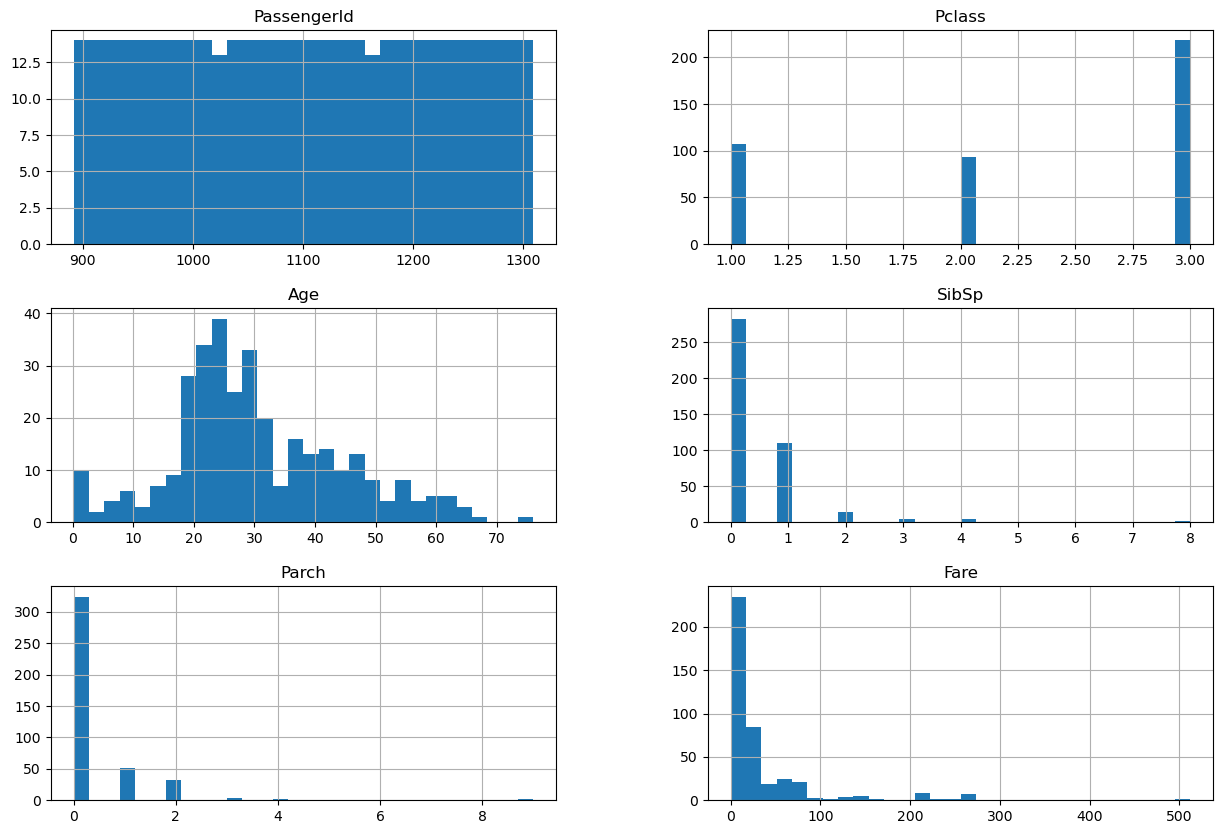

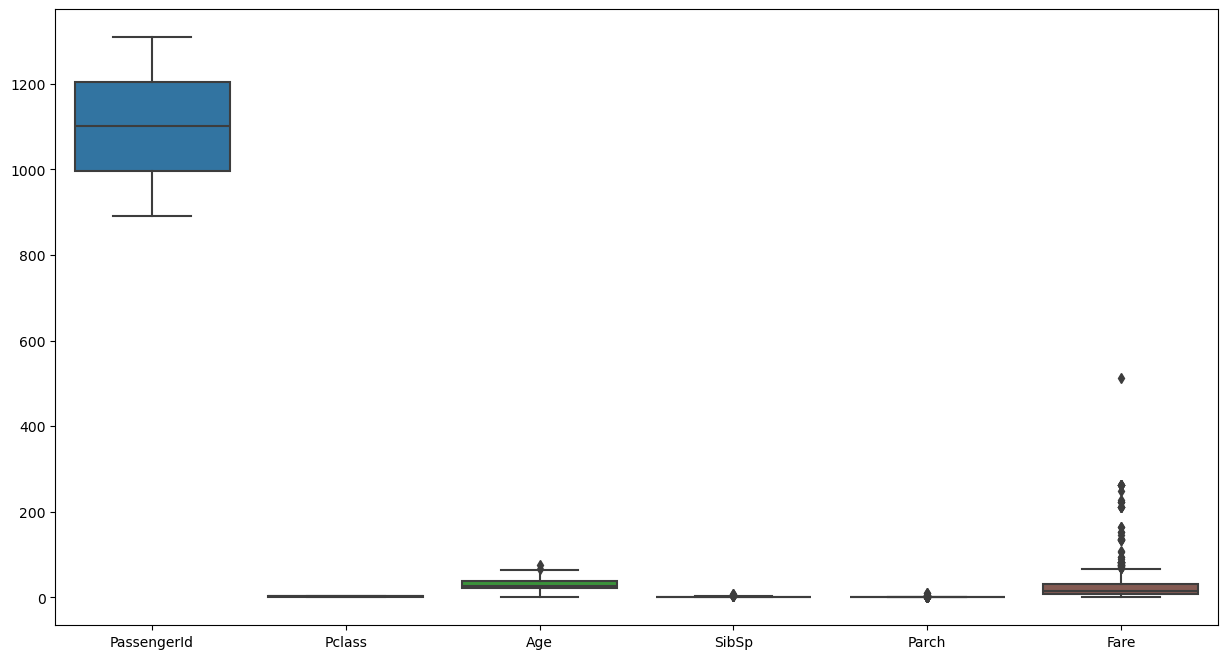

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

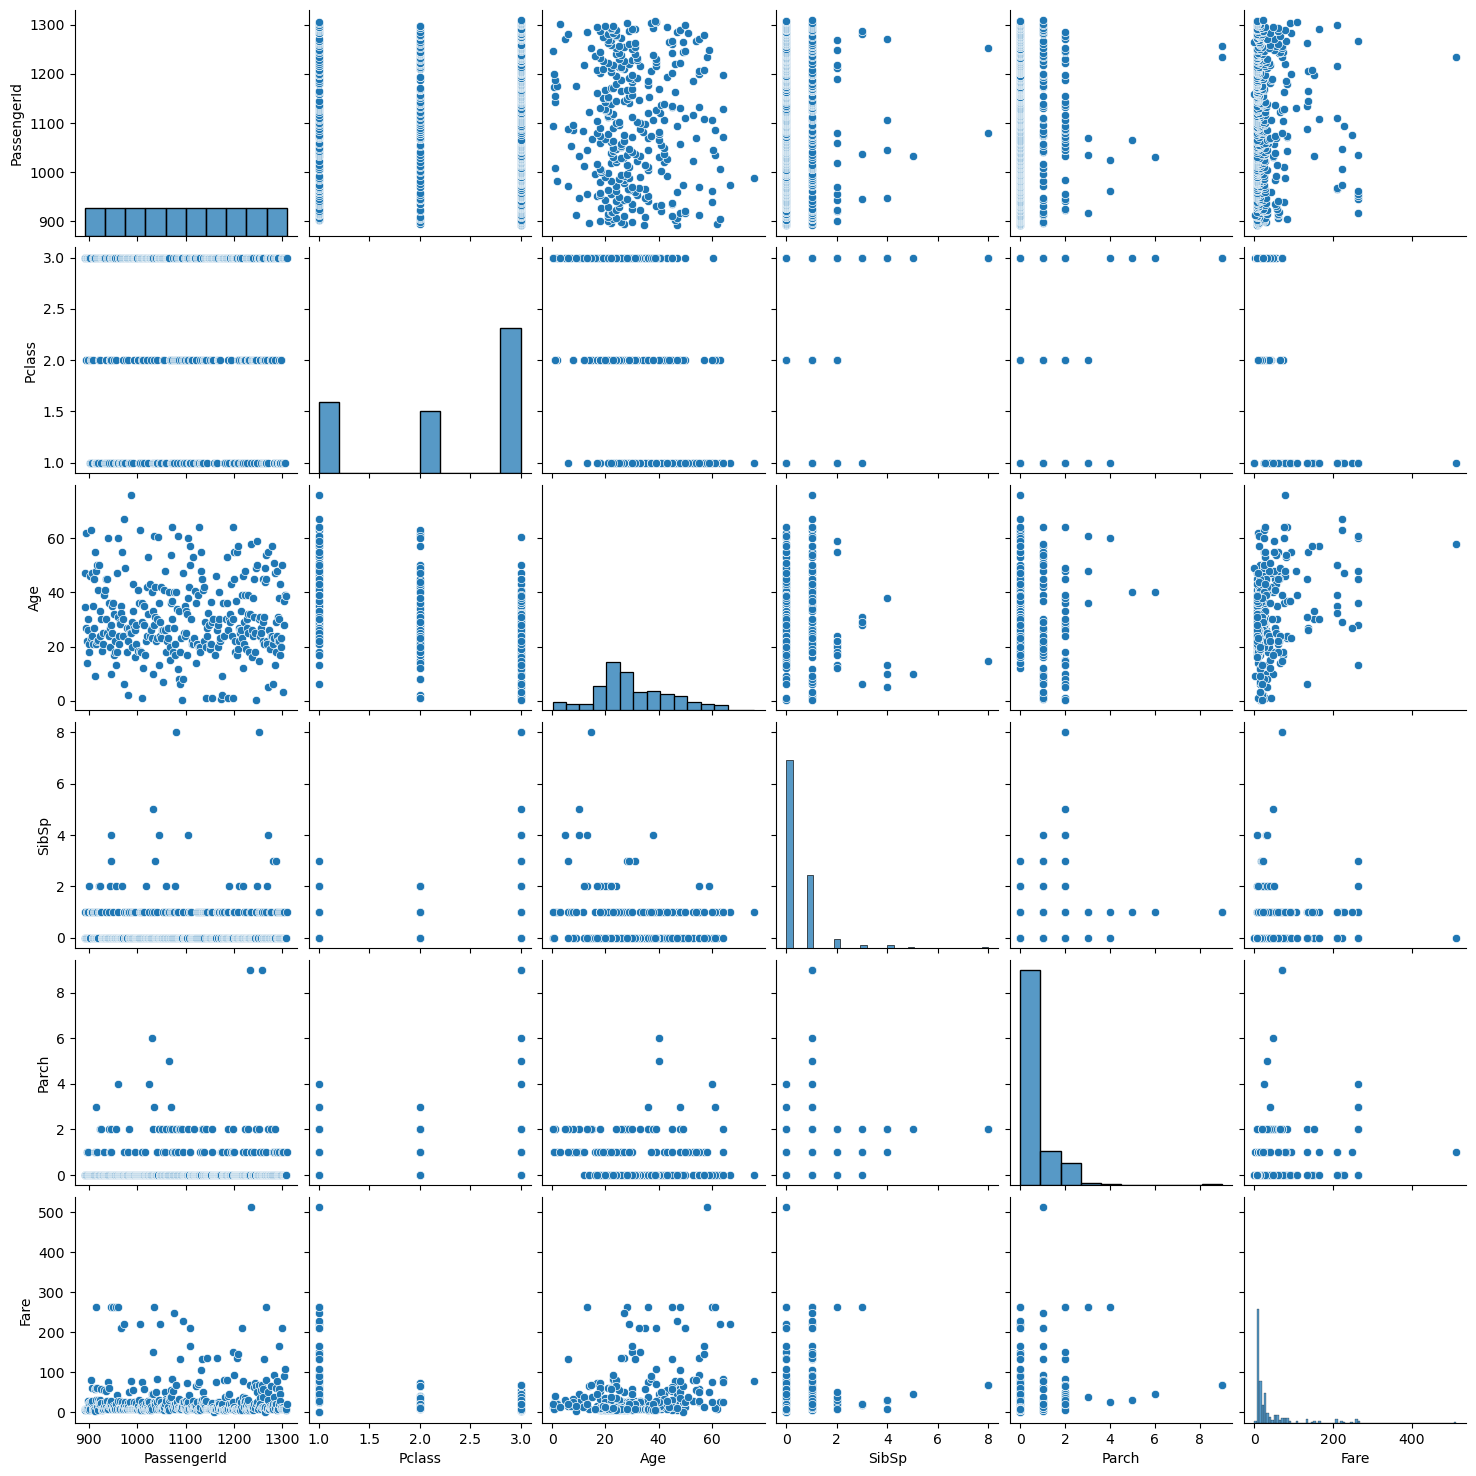

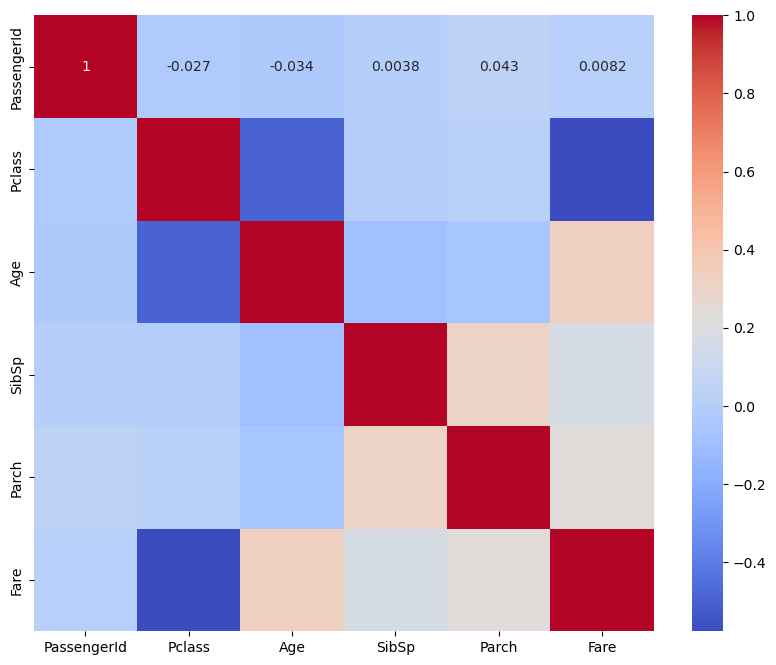

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\sai\OneDrive\Desktop\Titanic_test.csv" # Replace with your actual file path
data = pd.read_csv(file_path)

# Histogram of each feature
data.hist(bins=30, figsize=(15, 10))
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.select_dtypes(include=[float, int]))
plt.show()

# Pair plot to visualize relationships between features
sns.pairplot(data.select_dtypes(include=[float, int]))
plt.show()

# Correlation heatmap (only for numerical features)
plt.figure(figsize=(10, 8))
numerical_data = data.select_dtypes(include=[float, int])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()


# 2. Data Preprocessing

# a. Handle Missing Values


In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\sai\OneDrive\Desktop\Titanic_test.csv")

# Check for missing values
print(data.isnull().sum())

# Fill missing values with the mean for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Alternatively, you can use forward fill/backward fill for non-numeric columns if needed
# data.fillna(method='ffill', inplace=True)  # Forward fill
# data.fillna(method='bfill', inplace=True)  # Backward fill

# Verify that there are no missing values left
print(data.isnull().sum())


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


# b. Encode Categorical Variables


In [12]:
# Convert categorical data to numerical (e.g., using one-hot encoding)
data = pd.get_dummies(data, drop_first=True)

# Check the dataset after encoding
data.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abrahamsson, Mr. Abraham August Johannes","Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)",...,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_Q,Embarked_S
0,892,3,34.5,0,0,7.8292,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,893,3,47.0,1,0,7.0000,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,894,2,62.0,0,0,9.6875,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,895,3,27.0,0,0,8.6625,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,896,3,22.0,1,1,12.2875,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


# 3. Model Building


# a. Build and Train a Logistic Regression Model


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv(r"C:\Users\sai\OneDrive\Desktop\Titanic_test.csv")

# Print the column names to identify categorical and numerical features
print(data.columns)

# Identify features and target variable
X = data.drop('Age', axis=1)  # Features
y = data['Pclass']  # Target variable

# Preprocessing pipeline for numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize numeric features
])

# Preprocessing pipeline for categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine both pipelines into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and train the linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Use LinearRegression for continuous target
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the predictions
print(y_pred)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
[2.97843328 1.00610016 2.9981384  2.9935239  2.99735416 2.00836219
 2.993036   1.02253657 2.00778366 2.99330638 2.99432816 1.00789041
 2.99397058 0.99979731 2.99330808 2.98938445 2.99285579 1.00643552
 3.00186672 2.00947202 2.00818676 1.00743463 2.99793725 2.00830427
 2.99327845 2.99785802 1.00547217 1.02245215 2.9943756  2.00836217
 2.99606342 2.99015689 1.01098879 2.99348973 1.99413344 2.00850408
 2.99783748 1.99306383 2.00776211 0.99574634 2.99784259 2.99726307
 2.00705634 1.02125743 1.00739768 2.99341108 2.99906015 2.00663446
 1.00769924 2.99344904 2.99835189 2.99201283 2.99291406 2.00839679
 2.00701069 2.00774678 2.99349938 2.00832868 2.99738193 2.99817654
 2.9940603  2.0083205  1.0207515  2.00822198 2.00767841 2.00842063
 2.99353576 2.99349723 1.00708225 1.00829239 0.99820011 2.00512809
 2.99338915 1.02160911 1.00724403 2.99496569 1.00850887

# b. Train the model using the training data.


In [17]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\sai\OneDrive\Desktop\Titanic_train.csv")

# Check for missing values
print(data.isnull().sum())

# Fill missing values with the mean for numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Alternatively, you can use forward fill/backward fill for non-numeric columns if needed
# data.fillna(method='ffill', inplace=True)  # Forward fill
# data.fillna(method='bfill', inplace=True)  # Backward fill

# Verify that there are no missing values left
print(data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv(r"C:\Users\sai\OneDrive\Desktop\Titanic_train.csv")

# Print the column names to identify categorical and numerical features
print(data.columns)

# Identify features and target variable
X = data.drop('Age', axis=1)  # Replace 'Age' with the actual target column name
y = data['Pclass']  # Replace 'Age' with the actual target column name

# Preprocessing pipeline for numeric features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize numeric features
])

# Preprocessing pipeline for categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine both pipelines into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create and train the linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Use LinearRegression for continuous target
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Print a confirmation
print("Model training completed successfully.")


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Model training completed successfully.


# 4. Model Evaluation


# a. Evaluate the Model Performance


Accuracy: 0.6256983240223464
Precision: 0.5483870967741935
Recall: 0.4657534246575342
F1 Score: 0.5037037037037037
ROC-AUC: 0.6881623158438873


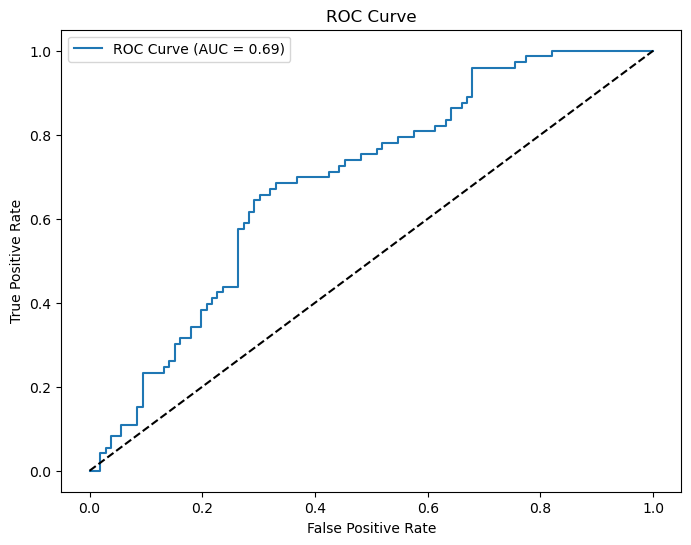

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load the dataset
data = pd.read_csv(r"C:\Users\sai\OneDrive\Desktop\Titanic_train.csv")

# Identify features and target variable
X = data.drop('Age', axis=1)  # Features
y = data['Age']  # Target variable

# Convert the target variable to binary (0 or 1) for classification
# Assuming 'Age' is the target variable and needs to be binarized.
# You need to adapt this according to your actual target variable.
y = (y > y.median()).astype(int)  # Example binarization

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine the preprocessing steps into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and model training
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))  # Adjust max_iter if needed
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict class labels and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


# 5. Interpretation


In [23]:
import numpy as np
import pandas as pd

# Extract the logistic regression model from the pipeline
logistic_model = model.named_steps['classifier']

# Extract the feature names after preprocessing (important due to one-hot encoding)
# Get the feature names for numeric and categorical columns
feature_names = numeric_features.tolist() + list(model.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features))

# Get the coefficients from the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to display the coefficients and their corresponding feature names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)  # Convert coefficients to odds ratios
})

# Sort the DataFrame by the absolute value of the coefficients
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the DataFrame
print(coef_df[['Feature', 'Coefficient', 'Odds Ratio']])

# Interpretation:
# A positive coefficient means that as the feature increases, the odds of the positive class (e.g., survival) increase.
# A negative coefficient means that as the feature increases, the odds of the positive class decrease.

# Discussion:
# Features with larger absolute coefficients have a more significant impact on the target variable.
# Odds ratios greater than 1 indicate an increase in the odds of the target variable as the feature increases, while those less than 1 indicate a decrease.


              Feature  Coefficient  Odds Ratio
751     Ticket_113781    -1.094193    0.334810
925    Ticket_3101278     1.045583    2.845058
1073    Ticket_363291     0.894532    2.446192
832     Ticket_239853    -0.831555    0.435372
930      Ticket_31027     0.816757    2.263149
...               ...          ...         ...
815     Ticket_231919     0.015178    1.015294
1390        Cabin_F33    -0.011842    0.988228
0         PassengerId    -0.007950    0.992081
1222  Ticket_PC 17760     0.006581    1.006603
858     Ticket_250655     0.004323    1.004332

[1400 rows x 3 columns]


# 6. Deployment with Streamlit

# a. Create a Streamlit App for Deployment


In [32]:
pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
import streamlit as st
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pickle

# Load the dataset
train_df = pd.read_csv(r"C:\\Users\\sai\\OneDrive\\Desktop\\Titanic_train.csv")

# Define a function to preprocess the data
def preprocess_data(df):
    # Handle missing values in 'Embarked' column
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    # Convert 'Sex' and 'Embarked' into numerical values using LabelEncoder
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Embarked'] = le.fit_transform(df['Embarked'])
    
    # Drop irrelevant features
    df = df.drop(['Ticket', 'Cabin', 'Name'], axis=1)
    
    return df

# Preprocess the data
train_df = preprocess_data(train_df)

X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize the features (Optional but recommended for logistic regression)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the trained model
pickle.dump(model, open('logistic_regression_model.pkl', 'wb'))

# Load the trained model
loaded_model = pickle.load(open('logistic_regression_model.pkl', 'rb'))

# Create a Streamlit app
st.title('Titanic Survival Prediction')
st.write('Please enter the following features to make a prediction:')

# Define the input fields
pclass = st.selectbox('Pclass', [1, 2, 3])
sex = st.selectbox('Sex', ['Male', 'Female'])
age = st.number_input('Age', min_value=0.0, max_value=100.0, value=30.0)
sibsp = st.number_input('SibSp', min_value=0, max_value=8, value=0)
parch = st.number_input('Parch', min_value=0, max_value=6, value=0)
fare = st.number_input('Fare', min_value=0.0, max_value=500.0, value=32.0)
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])
passenger_id = st.number_input('PassengerId', min_value=1, max_value=1000, value=1)

# Convert categorical inputs to numeric
sex = 1 if sex == 'Male' else 0
embarked = {'C': 0, 'Q': 1, 'S': 2}[embarked]

# Create a dataframe with the user input features
input_df = pd.DataFrame({
    'PassengerId': [passenger_id],
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked': [embarked]
})

# Preprocess the input data (Impute missing values and scale)
input_df = pd.DataFrame(imputer.transform(input_df), columns=input_df.columns)
input_df = pd.DataFrame(scaler.transform(input_df), columns=input_df.columns)

# Make a prediction using the loaded model
prediction = loaded_model.predict(input_df)

# Display the prediction
st.write('Prediction:', 'Survived' if prediction[0] == 1 else 'Not Survived')


In [42]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create an imputer for numerical columns
imputer_num = SimpleImputer(strategy='mean')

# Create an imputer for categorical columns (e.g., most frequent)
imputer_cat = SimpleImputer(strategy='most_frequent')

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', imputer_num, numerical_cols),
        ('cat', imputer_cat, categorical_cols)
    ]
)

# Create a pipeline that includes preprocessing, imputation, and the logistic regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('log_model', LogisticRegression())
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [183, 891]